# Importing necesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Loading and Analysing Data

In [2]:
#This dataset was downloaded from Kaggle for educational purposes
diab = pd.read_csv('diabetes.csv')

In [3]:
#Getting information about the dataset
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can observe that some values in Glucose, BloodPressure etc. are Zero, which makes no sense

In [4]:
#Getting  median values of all featurs
medians = diab.median()
medians

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [5]:
diab.shape

(768, 9)

Total number of samples are 768 and features are 9.

In [6]:
#Checking for null values
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No null values are present

In [7]:
#Removing zero values in some columns using their respective median values
temp = diab.drop(['Pregnancies','Outcome'],axis=1)
final_diab = temp.replace(0,medians)
final_diab['Pregnancies']=diab['Pregnancies']
final_diab['Outcome'] = diab['Outcome']
final_diab.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,3.845052,0.348958
std,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,3.369578,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,3.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.000000


Hence we have removed zero entries in fields where they are not possible and filled them with the respective medians.

# Creating training and test data

In [8]:
x = final_diab.drop('Outcome',axis=1)
y = final_diab['Outcome']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=5)

# Applying KNN

In [9]:
kn = KNeighborsClassifier()

In [10]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
pred1 = kn.predict(xtest)

In [12]:
accuracy_score(ytest,pred1)

0.7575757575757576

In [13]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       160
           1       0.59      0.69      0.64        71

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



# Applying Logistic Regression

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
pred2 = lr.predict(xtest)

In [17]:
accuracy_score(pred2,ytest)

0.7878787878787878

In [18]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.65      0.66      0.66        71

    accuracy                           0.79       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.79      0.79      0.79       231



# Applying Naive Bayes

In [19]:
nb = MultinomialNB()

In [20]:
nb.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
pred3 = nb.predict(xtest)

In [22]:
accuracy_score(pred3,ytest)

0.658008658008658

In [23]:
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       160
           1       0.43      0.37      0.40        71

    accuracy                           0.66       231
   macro avg       0.59      0.58      0.58       231
weighted avg       0.64      0.66      0.65       231



# Applying SVC

In [24]:
#assuming data is non-linear seperable
sv1= SVC(kernel='rbf',gamma=10)

In [25]:
sv1.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
pred4 = sv1.predict(xtest)

In [27]:
accuracy_score(pred4,ytest)

0.6926406926406926

In [28]:
print(classification_report(ytest,pred4))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       160
           1       0.00      0.00      0.00        71

    accuracy                           0.69       231
   macro avg       0.35      0.50      0.41       231
weighted avg       0.48      0.69      0.57       231



In [29]:
#assuming data is linear seperable
sv2 = SVC(kernel='linear')

In [30]:
sv2.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
pred5 = sv2.predict(xtest)

In [32]:
accuracy_score(pred5,ytest)

0.7748917748917749

In [33]:
print(classification_report(ytest,pred5))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       160
           1       0.63      0.66      0.64        71

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.78      0.77      0.78       231



# Applying Decision Tree

In [34]:
dt =  DecisionTreeClassifier()

In [35]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
dt.score(xtest,ytest)

0.6796536796536796

In [37]:
dt.score(xtrain,ytrain)

1.0

[Text(215.37958189655174, 211.4, 'X[0] <= 154.5\ngini = 0.465\nsamples = 537\nvalue = [340, 197]'),
 Text(130.13185344827588, 199.32, 'X[6] <= 28.5\ngini = 0.407\nsamples = 458\nvalue = [328, 130]'),
 Text(73.88689655172415, 187.24, 'X[4] <= 30.95\ngini = 0.259\nsamples = 249\nvalue = [211, 38]'),
 Text(24.013241379310347, 175.16, 'X[7] <= 7.0\ngini = 0.093\nsamples = 123\nvalue = [117, 6]'),
 Text(20.31889655172414, 163.07999999999998, 'X[0] <= 127.5\ngini = 0.079\nsamples = 122\nvalue = [117, 5]'),
 Text(7.388689655172414, 151.0, 'X[5] <= 0.672\ngini = 0.02\nsamples = 101\nvalue = [100, 1]'),
 Text(3.694344827586207, 138.92000000000002, 'gini = 0.0\nsamples = 88\nvalue = [88, 0]'),
 Text(11.083034482758622, 138.92000000000002, 'X[7] <= 2.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(7.388689655172414, 126.84, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(14.777379310344829, 126.84, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(33.24910344827587, 151.0, 'X[6] <= 24

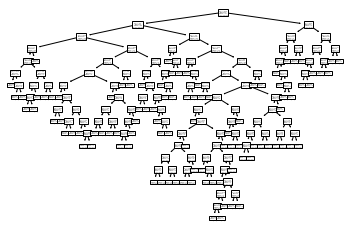

In [38]:
tree.plot_tree(dt)

Hence we see that our model has overfitted because there were too many features

# Applying Random Forest

In [63]:
rf = RandomForestClassifier(n_estimators=15)

In [64]:

rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
rf.score(xtrain,ytrain)

0.994413407821229

In [66]:
rf.score(xtest,ytest)

0.7489177489177489